In [ ]:
import json

import tensorflow.keras.layers as L
import tensorflow as tf
from sklearn.model_selection import train_test_split
import utility_fct
from keras.models import Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, ReLU, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow import keras
from keras.utils import plot_model


import numpy as np # manipulate N-dimensional arrays
import pandas as pd # data frame
import matplotlib.pyplot as plt # data plotting
import seaborn # advanced data plotting

import tensorflow as tf

In [ ]:
tf.__version__
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#train = pd.read_json("train.json",lines=True)

In [ ]:
pred_cols = ['reactivity', 'deg_Mg_pH10', 'deg_Mg_50C', 'deg_pH10', 'deg_50C']

In [ ]:
def MCRMSE(y_true, y_pred):
    colwise_mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=1)
    return tf.reduce_mean(tf.sqrt(colwise_mse), axis=1)
def RMSE(y_true, y_pred):
    colwise_rmse = tf.reduce_mean(tf.square(y_true - y_pred), axis=1)
    return colwise_rmse

In [ ]:
test_org = pd.read_json('test.json',lines=True)
test = pd.read_csv('test_final.csv')

In [ ]:
test.shape

(457953, 29)

In [ ]:
test_sub = utility_fct.expend_feature_test(test_org)

In [ ]:
train_seq = pd.read_csv('train_model.csv')

In [ ]:
seq = train_seq
seq.head(5)

,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C,C,G,U,E,H,I,M,S,X,),.,N_E,N_H,N_I,N_M,N_S,N_X,N_B,N_base_A,N_base_C,N_base_G,N_base_U,N_point
0,0.3297,0.7556,2.3375,0.3581,0.6382,0,1,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,2,0,36
1,1.5693,2.9830,3.5060,2.9683,3.4773,0,1,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,2,0,36
2,1.1227,0.2526,0.3008,0.2589,0.9988,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0,4,0,0,0,36
3,0.8686,1.3789,1.0108,1.4552,1.3228,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0,4,0,0,0,36
4,0.7217,0.6376,0.2635,0.7244,0.7877,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0,4,0,0,0,36


In [ ]:
from keras.backend import clear_session
clear_session()

In [ ]:
def mcrmse(y_true, y_pred):
        cmse = tf.reduce_mean(tf.square(y_true - y_pred), axis=1)
        res = float(tf.reduce_mean(tf.sqrt(cmse)))
        return res

In [ ]:
y = seq.loc[:,["reactivity","deg_Mg_pH10","deg_pH10","deg_Mg_50C","deg_50C"]]
X = seq.loc[:,['C', 'G', 'U','E', 'H', 'I', 'M', 'S', 'X', ')', '.']]
X_train, X_test, y_train, y_true = train_test_split(X, y, test_size=0.2, random_state=1,shuffle=False)

In [ ]:
X_sub = test.loc[:,['C', 'G', 'U','E', 'H', 'I', 'M', 'S', 'X', ')', '.']]

In [ ]:
opt = Adam(lr=0.001)

In [ ]:
features_2 = ['C','G', 'U', 'E', 'H', 'I', 'M', 'S', 'X', ')', '.', 'N_E', 'N_H', 'N_I',
       'N_M', 'N_S', 'N_X', 'N_B', 'N_base_A', 'N_base_C', 'N_base_G',
       'N_base_U', 'N_point']

X_2 = seq.loc[:, features_2]
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.2, random_state=1,shuffle=False)
X_sub_2 = test.loc[:,features_2]

In [ ]:
X_2

,C,G,U,E,H,I,M,S,X,),.,N_E,N_H,N_I,N_M,N_S,N_X,N_B,N_base_A,N_base_C,N_base_G,N_base_U,N_point
0,0,1,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,2,0,36
1,0,1,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,2,0,36
2,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0,4,0,0,0,36
3,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0,4,0,0,0,36
4,0,0,0,1,0,0,0,0,0,0,1,5,0,0,0,0,0,0,4,0,0,0,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108047,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,1,0,0,16
108048,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,0,1,16
108049,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,1,0,0,0,16
108050,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,5,0,0,0,0,1,0,16


In [ ]:
clear_session()
shape = X_2.shape[1]

In [ ]:
  model = Sequential()
  model.add(Dense(1000,input_shape = [shape])) 
  model.add(ReLU())
  model.add(Dropout(0.3))
  model.add(Dense(500))
  model.add(ReLU())
  model.add(Dropout(0.3))
  model.add(Dense(150))
  model.add(ReLU())
  model.add(Dropout(0.3))
  model.add(Dense(100))
  model.add(ReLU())
  model.add(Dropout(0.3))
  model.add(Dense(50))
  model.add(ReLU())
  model.add(Dropout(0.3))
  model.add(Dense(y.shape[1]))
  print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1000)              24000     
_________________________________________________________________
re_lu (ReLU)                 (None, 1000)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               500500    
_________________________________________________________________
re_lu_1 (ReLU)               (None, 500)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               7

In [ ]:
model.compile(loss=RMSE,
              optimizer=opt)

In [ ]:
batch_size = 200
epochs = 100
hist_MLP = model.fit(X_train_2, y_train_2,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3)

Epoch 1/100
303/303 [==============================] - 1s 4ms/step - loss: 0.1599 - val_loss: 0.1572
Epoch 2/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1603 - val_loss: 0.1569
Epoch 3/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1599 - val_loss: 0.1556
Epoch 4/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1607 - val_loss: 0.1554
Epoch 5/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1605 - val_loss: 0.1553
Epoch 6/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1598 - val_loss: 0.1558
Epoch 7/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1605 - val_loss: 0.1563
Epoch 8/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1587 - val_loss: 0.1542
Epoch 9/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1594 - val_loss: 0.1564
Epoch 10/100
303/303 [==============================] - 1s 3ms/step - loss: 0.1598 - val_lo

In [ ]:
y_sub = model.predict(test.loc[:, features_2])
y_pred_dlp = pd.DataFrame(y_sub, columns= ['reactivity', 
            'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C'])

y_pred_dlp.insert(0, "id_seqpos", test_sub['id'], True) 

In [ ]:
y_pred_dlp

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,1.038507,1.347965,2.496107,1.278008,1.295117
1,id_00073f8be_1,1.038507,1.347965,2.496107,1.278008,1.295117
2,id_00073f8be_2,0.919017,0.757241,0.832960,0.920761,0.895662
3,id_00073f8be_3,0.919017,0.757241,0.832960,0.920761,0.895662
4,id_00073f8be_4,0.919017,0.757241,0.832960,0.920761,0.895662
...,...,...,...,...,...,...
457948,id_ffda94f24_125,0.587840,0.656110,0.648602,0.616752,0.612494
457949,id_ffda94f24_126,0.395314,0.511207,0.646629,0.543345,0.584987
457950,id_ffda94f24_127,0.587840,0.656110,0.648602,0.616752,0.612494
457951,id_ffda94f24_128,0.587840,0.656110,0.648602,0.616752,0.612494


In [ ]:
y_pred_dlp.to_csv('mlp_rmse.csv', index=False)


In [ ]:
shape = X_2.shape[1]

In [ ]:
  model_2 = Sequential()
  model_2.add(Dense(1000,input_shape = [shape])) 
  model_2.add(ReLU())
  model_2.add(Dropout(0.3))
  model_2.add(Dense(500))
  model_2.add(ReLU())
  model_2.add(Dropout(0.4))
  model_2.add(Dense(150))
  model_2.add(ReLU())
  model_2.add(Dropout(0.4))
  model_2.add(Dense(100))
  model_2.add(ReLU())
  model_2.add(Dropout(0.3))
  model_2.add(Dense(50))
  model_2.add(ReLU())
  model_2.add(Dropout(0.3))
  model_2.add(Dense(y.shape[1]))
  print(model_2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              23000     
_________________________________________________________________
re_lu_5 (ReLU)               (None, 1000)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 500)               500500    
_________________________________________________________________
re_lu_6 (ReLU)               (None, 500)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 150)              

In [ ]:
model_2.compile(loss=mcrmse,
              optimizer=opt)

In [ ]:
batch_size = 200
epochs = 30
hist_MLP_2 = model_2.fit(X_train_2, y_train_2,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3)

Epoch 1/30
303/303 [==============================] - 2s 4ms/step - loss: 0.3565 - val_loss: 0.2913
Epoch 2/30
303/303 [==============================] - 1s 3ms/step - loss: 0.2949 - val_loss: 0.2835
Epoch 3/30
303/303 [==============================] - 1s 3ms/step - loss: 0.2916 - val_loss: 0.2847
Epoch 4/30
303/303 [==============================] - 1s 3ms/step - loss: 0.2924 - val_loss: 0.2860
Epoch 5/30
303/303 [==============================] - 1s 3ms/step - loss: 0.2882 - val_loss: 0.2821
Epoch 6/30
303/303 [==============================] - 1s 3ms/step - loss: 0.2884 - val_loss: 0.2826
Epoch 7/30
303/303 [==============================] - 1s 3ms/step - loss: 0.2868 - val_loss: 0.2805
Epoch 8/30
303/303 [==============================] - 1s 3ms/step - loss: 0.2892 - val_loss: 0.2808
Epoch 9/30
303/303 [==============================] - 1s 3ms/step - loss: 0.2872 - val_loss: 0.2813
Epoch 10/30
303/303 [==============================] - 1s 3ms/step - loss: 0.2858 - val_loss: 0.2795

In [ ]:
y_sub_2 = model_2.predict(test.loc[:, features_2])
y_pred_MLP_loss2 = pd.DataFrame(y_sub_2, columns= ['reactivity', 
            'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C'])

y_pred_MLP_loss2.insert(0, "id_seqpos", test_sub['id'], True) 

In [ ]:
y_pred_MLP_loss2.head()

,id_seqpos,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,id_00073f8be_0,0.801734,0.987918,2.022599,0.896386,0.959258
1,id_00073f8be_1,0.801734,0.987918,2.022599,0.896386,0.959258
2,id_00073f8be_2,0.841243,0.691480,0.761884,0.840403,0.820002
3,id_00073f8be_3,0.841243,0.691480,0.761884,0.840403,0.820002
4,id_00073f8be_4,0.841243,0.691480,0.761884,0.840403,0.820002


In [ ]:
y_pred_MLP_loss2.to_csv('mlp_mcrmse.csv', index=False)


In [ ]:
def evaluate(model, test_features, test_y):
    predictions = model.predict(test_features)
    mcrmsc = utility_fct.mcrmsc_yannick(test_y, predictions)[0]
    print('MCRMSC: {:0.4f}.'.format(mcrmsc))
    
    return mcrmsc

In [ ]:
model_3 = Sequential()
model_3.add(Dense(1000,input_shape = [shape]))
model_3.add(ReLU())
model_3.add(Dropout(0.3))
model_3.add(Dense(500))
model_3.add(ReLU())
model_3.add(Dropout(0.3))
model_3.add(Dense(150))
model_3.add(ReLU())
model_3.add(Dropout(0.3))
model_3.add(Dense(100))
model_3.add(ReLU())
model_3.add(Dropout(0.3))
model_3.add(Dense(50))
model_3.add(ReLU())
model_3.add(Dropout(0.3))
model_3.add(Dense(y.shape[1]))
print(model_3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              23000     
_________________________________________________________________
re_lu_10 (ReLU)              (None, 1000)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 500)               500500    
_________________________________________________________________
re_lu_11 (ReLU)              (None, 500)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 150)              

In [ ]:
model_3.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=opt)

In [ ]:
batch_size = 200
epochs = 30
hist_MLP_3 = model_3.fit(X_train_2, y_train_2,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3)

Epoch 1/30
303/303 [==============================] - 2s 4ms/step - loss: 0.3015 - val_loss: 0.1630
Epoch 2/30
303/303 [==============================] - 1s 3ms/step - loss: 0.1720 - val_loss: 0.1655
Epoch 3/30
303/303 [==============================] - 1s 3ms/step - loss: 0.1715 - val_loss: 0.1645
Epoch 4/30
303/303 [==============================] - 1s 3ms/step - loss: 0.1701 - val_loss: 0.1593
Epoch 5/30
303/303 [==============================] - 1s 3ms/step - loss: 0.1663 - val_loss: 0.1591
Epoch 6/30
303/303 [==============================] - 1s 3ms/step - loss: 0.1653 - val_loss: 0.1628
Epoch 7/30
303/303 [==============================] - 1s 3ms/step - loss: 0.1652 - val_loss: 0.1580
Epoch 8/30
303/303 [==============================] - 1s 3ms/step - loss: 0.1611 - val_loss: 0.1581
Epoch 9/30
303/303 [==============================] - 1s 3ms/step - loss: 0.1637 - val_loss: 0.1586
Epoch 10/30
303/303 [==============================] - 1s 3ms/step - loss: 0.1656 - val_loss: 0.1609

In [ ]:
y_sub_3 = model_3.predict(test.loc[:, features_2])
y_pred_MLP_loss3 = pd.DataFrame(y_sub_3, columns= ['reactivity', 
            'deg_Mg_pH10', 'deg_pH10', 'deg_Mg_50C', 'deg_50C'])

y_pred_MLP_loss3.insert(0, "id_seqpos", test_sub['id'], True) 

In [ ]:
y_pred_MLP_loss3.to_csv('mlp_mse.csv', index=False)

In [ ]:
loss_mse = evaluate(model_3, X_test_2, y_test_2)
loss_mcrmse = evaluate(model_2, X_test_2, y_test_2)
loss_rmse = evaluate(model, X_test_2, y_test_2)

ValueError: ignored

In [ ]:
#loss_mse_train = evaluate(model_3, X_train_2, y_train_2)
#loss_mcrmse_train = evaluate(model_2, X_train_2, y_train_2)
loss_rmse_train = evaluate(model, X_train_2, y_train_2)

MCRMSC: 0.3874.


In [ ]:
print('test set loss with rmse =', loss_rmse)
#print('test set loss with mse =', loss_mse)
#print('test set loss with mcrmse =', loss_mcrmse)

test set loss with rmse = 0.3919928030661709


We can see there are not much differnce between rmse and mse loss on the test data set. But while with uplod, compare to public test dataset. rmse has a much better score, 2%. Which means MSE and MCRMSE are prone to over fit the train data set and RMSE is much better than the other two in terme of choice of loss. 

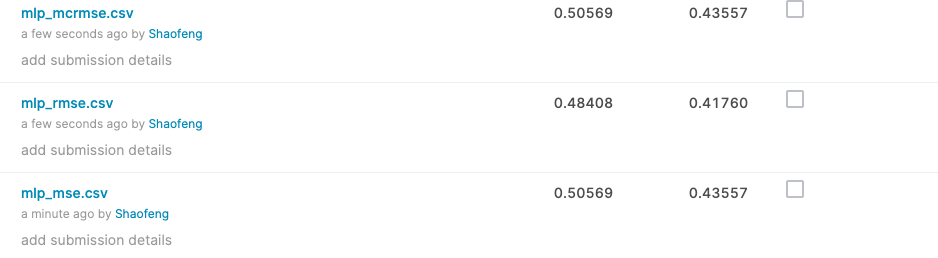

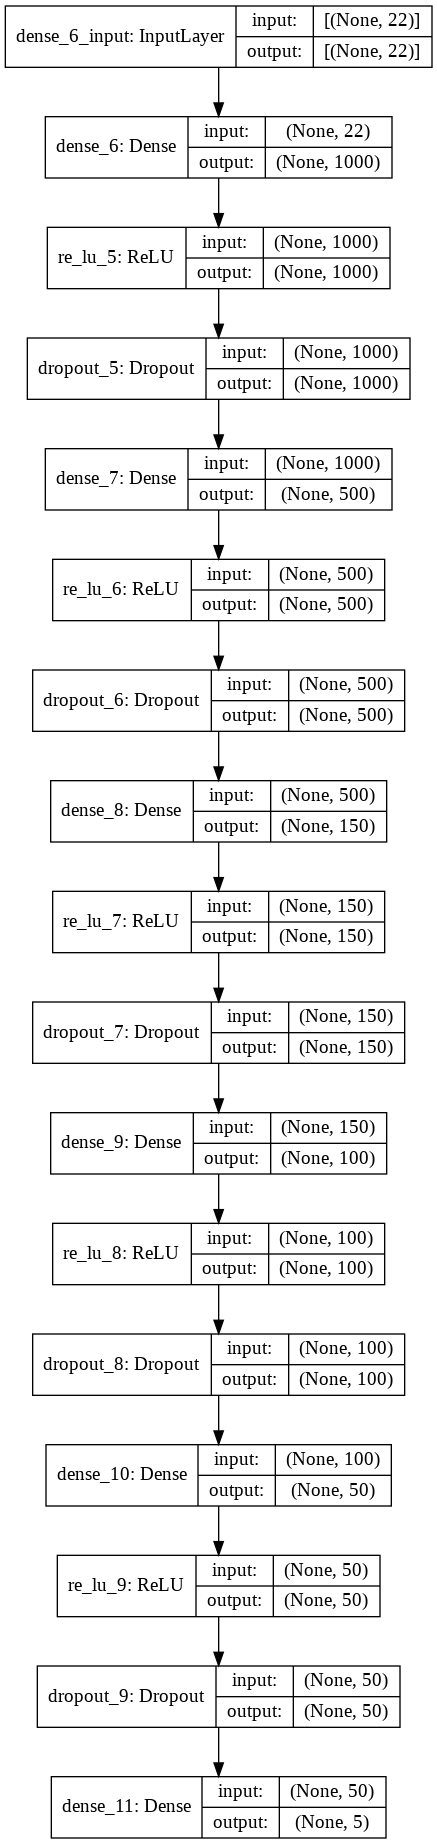

In [ ]:
plot_model(model_2,show_shapes=True)
